# ANN ile Kalp Hastalığı Tahmini

In [229]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve,auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

In [230]:
df=pd.read_csv("/Users/tahalenger/Desktop/Medeniyet Üni/DL/Heart_Disease_Prediction.csv")

In [231]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [232]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [233]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [235]:
df['Sex'].unique()

array([1, 0])

In [236]:
df['Heart Disease']=pd.get_dummies(df['Heart Disease'],drop_first=True,dtype=int)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [237]:
columns_for_boxplotting=['Age','BP','Cholesterol','Max HR','ST depression']
columns_for_boxplotting

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

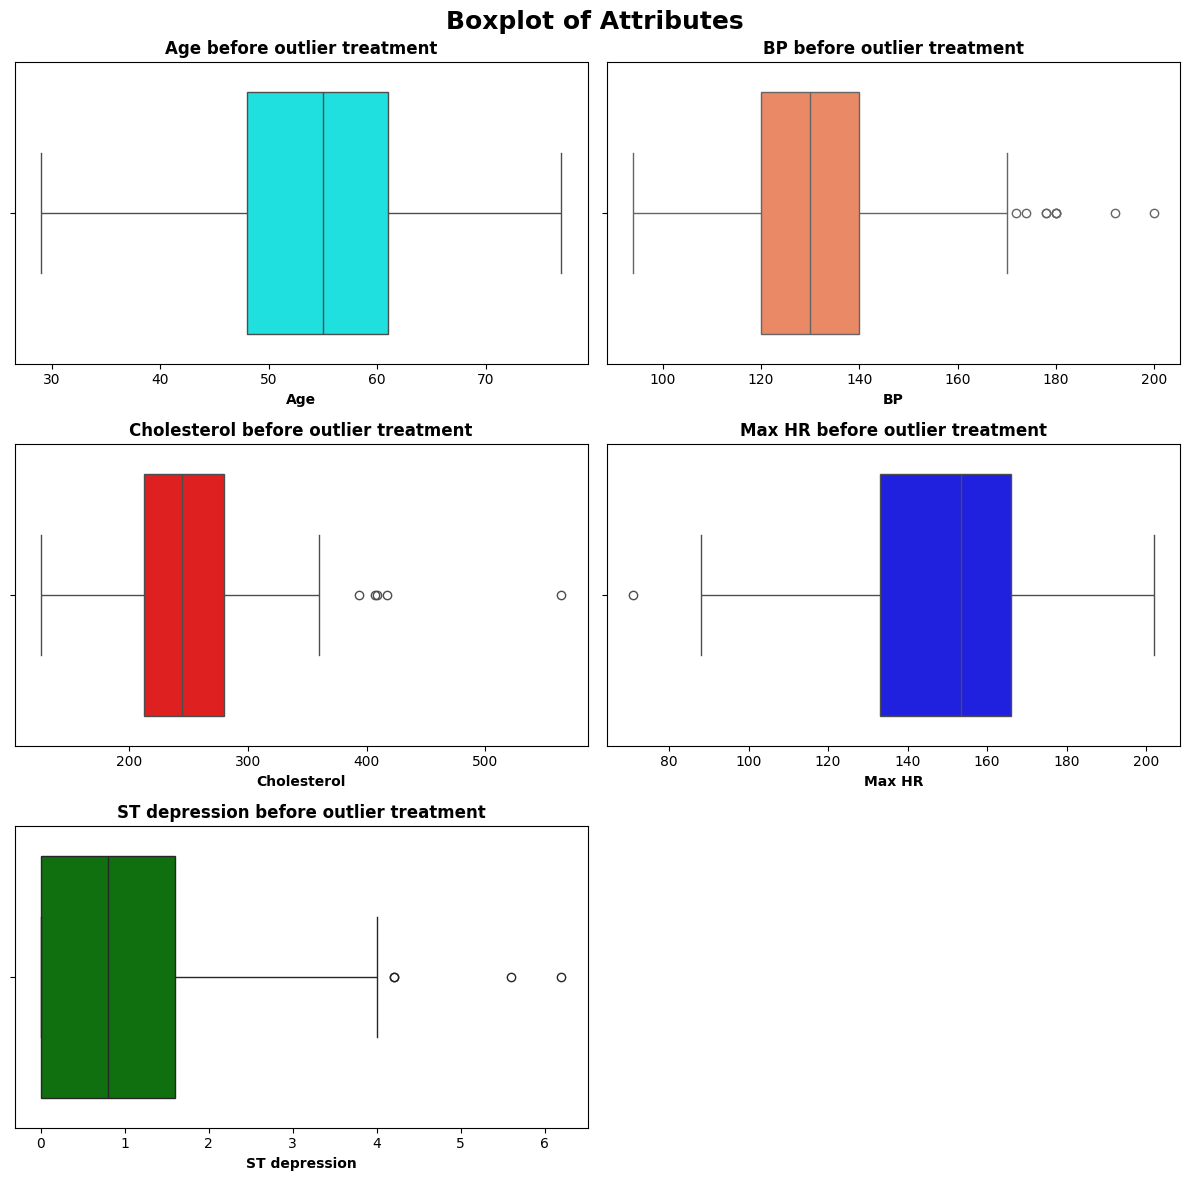

In [238]:
fig,axes=plt.subplots(3,2,figsize=(12,12))
colours=['cyan','coral','red','blue','green']
axes=axes.flatten()
plt.delaxes(axes[-1])

for index in range(len(columns_for_boxplotting)):
    sns.boxplot(x=df[columns_for_boxplotting[index]],ax=axes[index],color=colours[index])
    axes[index].set_xlabel(f'{columns_for_boxplotting[index]}',fontweight='bold')
    axes[index].set_title(f"{columns_for_boxplotting[index]} before outlier treatment", fontweight='bold')

plt.suptitle("Boxplot of Attributes",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [239]:
for index in range(len(columns_for_boxplotting)):
    Q1=df[columns_for_boxplotting[index]].quantile(0.25)
    Q3=df[columns_for_boxplotting[index]].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df=df[(df[columns_for_boxplotting[index]]>=lower_limit) & (df[columns_for_boxplotting[index]]<=upper_limit)]
    

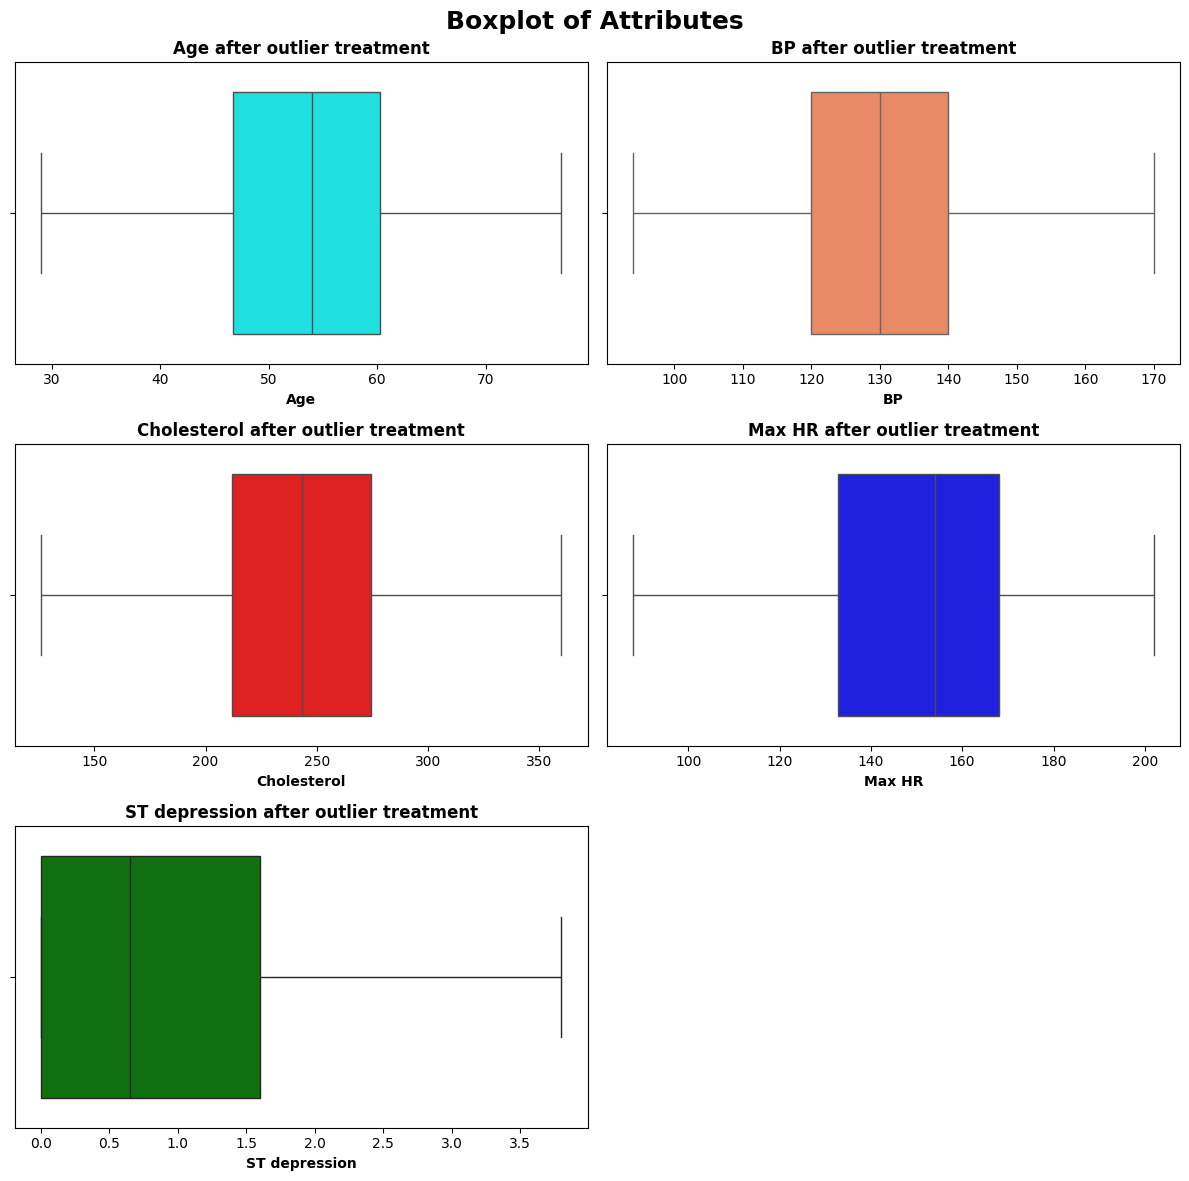

In [240]:
fig,axes=plt.subplots(3,2,figsize=(12,12))
colours=['cyan','coral','red','blue','green']
axes=axes.flatten()
plt.delaxes(axes[-1])

for index in range(len(columns_for_boxplotting)):
    sns.boxplot(x=df[columns_for_boxplotting[index]],ax=axes[index],color=colours[index])
    axes[index].set_xlabel(f'{columns_for_boxplotting[index]}',fontweight='bold')
    axes[index].set_title(f"{columns_for_boxplotting[index]} after outlier treatment", fontweight='bold')

plt.suptitle("Boxplot of Attributes",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [241]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [242]:
df=pd.concat([df,pd.get_dummies(df['Slope of ST'],prefix='Slope of ST',drop_first=True,dtype=int)],axis=1)
df=pd.concat([df,pd.get_dummies(df['Number of vessels fluro'],prefix='Number of vessels fluro',drop_first=True,dtype=int)],axis=1)
df=pd.concat([df,pd.get_dummies(df['EKG results'],prefix='EKG results',drop_first=True,dtype=int)],axis=1)
df=pd.concat([df,pd.get_dummies(df['Chest pain type'],prefix='Chest pain type',drop_first=True,dtype=int)],axis=1)
df=pd.concat([df,pd.get_dummies(df['Thallium'],prefix='Thallium',drop_first=True,dtype=int)],axis=1)
df=df.drop(columns=['Thallium'])
df=df.drop(columns=['Chest pain type'])
df=df.drop(columns=['EKG results'])
df=df.drop(columns=['Number of vessels fluro'])
df=df.drop(columns=['Slope of ST'])
df

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Slope of ST_2,...,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,EKG results_1,EKG results_2,Chest pain type_2,Chest pain type_3,Chest pain type_4,Thallium_6,Thallium_7
0,70,1,130,322,0,109,0,2.4,1,1,...,0,0,1,0,1,0,0,1,0,0
2,57,1,124,261,0,141,0,0.3,1,0,...,0,0,0,0,0,1,0,0,0,1
3,64,1,128,263,0,105,1,0.2,0,1,...,1,0,0,0,0,0,0,1,0,1
4,74,0,120,269,0,121,1,0.2,0,0,...,1,0,0,0,1,1,0,0,0,0
5,65,1,120,177,0,140,0,0.4,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,48,1,110,229,0,168,0,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
266,44,1,120,263,0,173,0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
267,56,0,140,294,0,153,0,1.3,0,1,...,0,0,0,0,1,1,0,0,0,0
268,57,1,140,192,0,148,0,0.4,0,1,...,0,0,0,0,0,0,0,1,1,0


In [244]:
columns_for_scaling=['Age','BP','Cholesterol','Max HR','ST depression']

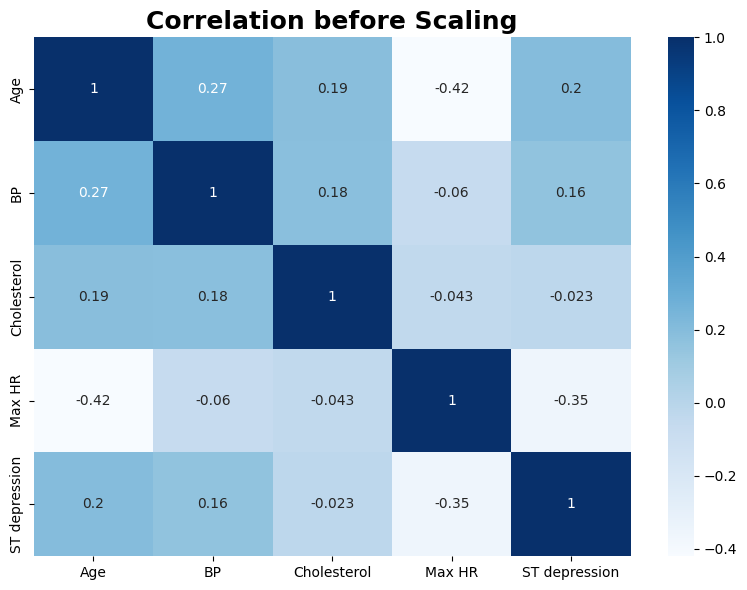

In [245]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columns_for_scaling].corr(),annot=True,cmap='Blues')
plt.title("Correlation before Scaling",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [246]:
scaler=StandardScaler()
df[columns_for_scaling]=scaler.fit_transform(df[columns_for_scaling])
joblib.dump(scaler,'std_scaler.bin')
df

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Slope of ST_2,...,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,EKG results_1,EKG results_2,Chest pain type_2,Chest pain type_3,Chest pain type_4,Thallium_6,Thallium_7
0,1.741385,1,0.043865,1.740516,0,-1.797017,0,1.427777,1,1,...,0,0,1,0,1,0,0,1,0,0
2,0.323697,1,-0.346278,0.353229,0,-0.397447,0,-0.656580,1,0,...,0,0,0,0,0,1,0,0,0,1
3,1.087067,1,-0.086182,0.398714,0,-1.971963,1,-0.755836,0,1,...,1,0,0,0,0,0,0,1,0,1
4,2.177597,0,-0.606373,0.535169,0,-1.272178,1,-0.755836,0,0,...,1,0,0,0,1,1,0,0,0,0
5,1.196120,1,-0.606373,-1.557133,0,-0.441184,0,-0.557325,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-0.657780,1,-1.256611,-0.374528,0,0.783440,0,0.038205,1,0,...,0,0,0,0,0,1,0,0,0,1
266,-1.093991,1,-0.606373,0.398714,0,1.002123,0,-0.954346,0,0,...,0,0,0,0,0,1,0,0,0,1
267,0.214644,0,0.694103,1.103729,0,0.127391,0,0.335971,0,1,...,0,0,0,0,1,1,0,0,0,0
268,0.323697,1,0.694103,-1.215997,0,-0.091291,0,-0.557325,0,1,...,0,0,0,0,0,0,0,1,1,0


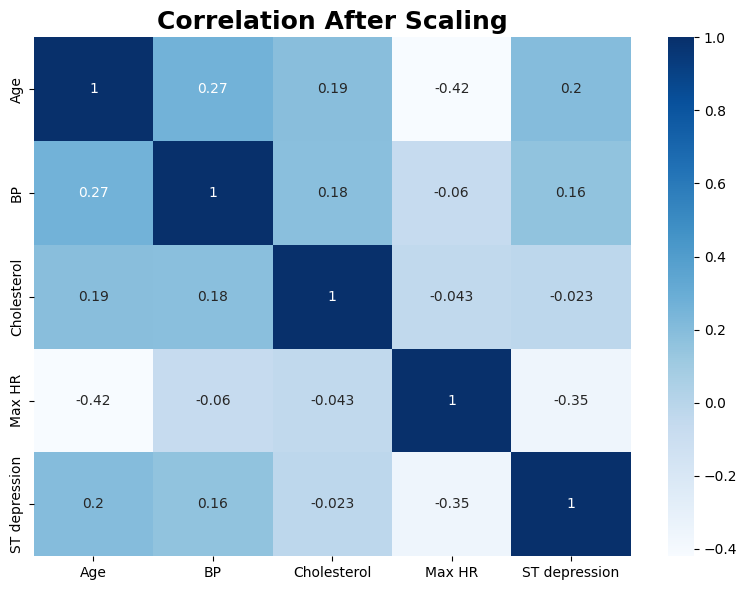

In [247]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columns_for_scaling].corr(),annot=True,cmap='Blues')
plt.title("Correlation After Scaling",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [248]:
df

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Slope of ST_2,...,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,EKG results_1,EKG results_2,Chest pain type_2,Chest pain type_3,Chest pain type_4,Thallium_6,Thallium_7
0,1.741385,1,0.043865,1.740516,0,-1.797017,0,1.427777,1,1,...,0,0,1,0,1,0,0,1,0,0
2,0.323697,1,-0.346278,0.353229,0,-0.397447,0,-0.656580,1,0,...,0,0,0,0,0,1,0,0,0,1
3,1.087067,1,-0.086182,0.398714,0,-1.971963,1,-0.755836,0,1,...,1,0,0,0,0,0,0,1,0,1
4,2.177597,0,-0.606373,0.535169,0,-1.272178,1,-0.755836,0,0,...,1,0,0,0,1,1,0,0,0,0
5,1.196120,1,-0.606373,-1.557133,0,-0.441184,0,-0.557325,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-0.657780,1,-1.256611,-0.374528,0,0.783440,0,0.038205,1,0,...,0,0,0,0,0,1,0,0,0,1
266,-1.093991,1,-0.606373,0.398714,0,1.002123,0,-0.954346,0,0,...,0,0,0,0,0,1,0,0,0,1
267,0.214644,0,0.694103,1.103729,0,0.127391,0,0.335971,0,1,...,0,0,0,0,1,1,0,0,0,0
268,0.323697,1,0.694103,-1.215997,0,-0.091291,0,-0.557325,0,1,...,0,0,0,0,0,0,0,1,1,0


In [249]:
y=df['Heart Disease']

X_train,X_test=train_test_split(df,test_size=0.25,random_state=44,stratify=y)

Y_train=X_train['Heart Disease']
X_train=X_train.drop(columns=['Heart Disease'])

Y_test=X_test['Heart Disease']
X_test=X_test.drop(columns=['Heart Disease'])

In [250]:
Y_test.value_counts()

Heart Disease
0    36
1    27
Name: count, dtype: int64

In [251]:
Y_train.value_counts()

Heart Disease
0    108
1     81
Name: count, dtype: int64

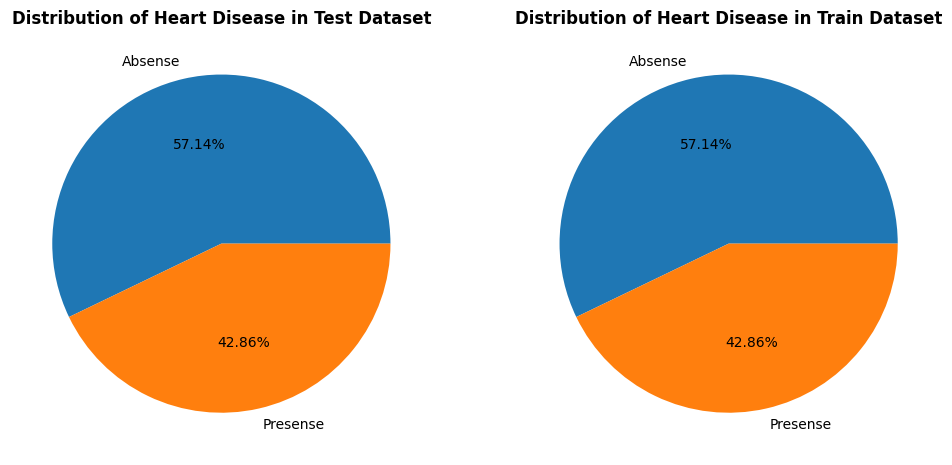

In [252]:
fig,axes=plt.subplots(1,2,figsize=(12,8))

axes[0].pie(Y_test.value_counts(),labels=['Absense','Presense'],autopct= '%.2f%%')
axes[0].set_title("Distribution of Heart Disease in Test Dataset",fontweight='bold')

axes[1].pie(Y_train.value_counts(),labels=['Absense','Presense'],autopct= '%.2f%%')
axes[1].set_title("Distribution of Heart Disease in Train Dataset",fontweight='bold')
plt.show()

In [253]:
joblib.dump(X_train.columns.tolist(), 'model_columns.bin')

['model_columns.bin']

In [188]:
model = Sequential([
    # Giriş Katmanı ve İlk Gizli Katman
    Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2), # Overfitting'i önlemek için
    
    Dense(units=12, activation='relu'),

    Dense(units=8, activation='relu'),
    
    # İkinci Gizli Katman
    Dense(units=4, activation='relu'),
    
    # Çıkış Katmanı (Binari sınıflandırma olduğu için Sigmoid)
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli Eğit
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/50


/Users/tahalenger/Desktop/Medeniyet Üni/DL/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5344 - loss: 0.6868 - val_accuracy: 0.6508 - val_loss: 0.6785
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5979 - loss: 0.6866 - val_accuracy: 0.6667 - val_loss: 0.6751
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6190 - loss: 0.6809 - val_accuracy: 0.6984 - val_loss: 0.6716
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6878 - loss: 0.6796 - val_accuracy: 0.7302 - val_loss: 0.6674
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6772 - loss: 0.6762 - val_accuracy: 0.7619 - val_loss: 0.6631
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7302 - loss: 0.6701 - val_accuracy: 0.7778 - val_loss: 0.6582
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7143 - loss: 0.6664 - val_accuracy: 0.7937 - val_loss: 0.6525
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7460 - loss: 0.6589 - val_accuracy: 0.8095 - val_loss: 0.6463
Epoch 9/50
6/6 ━━━

In [196]:
model.save('heart_disease_model.keras')

In [201]:
X_test

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Thallium_6,Thallium_7,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3
27,-0.330621,0,-0.606373,1.126471,0,0.302338,0,-0.358815,0,0,0,1,0,0,1,0,0,0,0,0
60,0.323697,1,1.344341,-2.716996,1,1.002123,0,-0.755836,0,1,0,1,0,0,0,0,0,1,0,0
25,-0.657780,0,0.043865,0.671623,0,-0.484920,0,-0.755836,0,0,0,1,0,0,0,0,0,0,0,0
244,-0.330621,0,0.694103,1.422123,0,-0.353711,0,0.534481,0,0,0,1,0,0,1,0,0,1,0,0
93,-0.003462,1,-1.256611,-0.897603,0,-1.840754,1,-0.954346,0,0,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.548727,0,0.043865,0.535169,0,0.564757,0,-0.954346,0,0,0,0,1,0,0,0,0,0,0,0
157,-0.984938,1,-0.086182,1.422123,0,0.870913,0,-0.954346,0,0,1,0,0,0,1,0,0,0,0,0
210,0.541803,1,2.644817,0.967274,0,0.389811,0,-0.755836,0,1,0,0,0,0,1,1,0,0,0,0
203,-0.330621,1,0.694103,1.217441,0,1.002123,1,0.633736,0,1,0,0,1,0,0,0,0,0,0,0


In [197]:
Y_predicted=(model.predict(X_test)>0.5).astype(int).flatten()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [198]:
dataframe=pd.DataFrame({'Original_Status': Y_test,'Predicted_Status': Y_predicted}).reset_index().rename(columns={'index':'Patient_Identifier'})
dataframe.head(10)

,Patient_Identifier,Original_Status,Predicted_Status
0,27,0,0
1,60,0,0
2,25,0,0
3,244,0,0
4,93,1,1
5,68,0,0
6,121,1,1
7,48,1,0
8,141,0,0
9,184,0,0


In [191]:
print(f"The accuracy of the model is : {round(accuracy_score(Y_test,Y_predicted)*100,2)}")

The accuracy of the model is : 87.3


In [192]:
print(f"The confusion matrix is : \n{confusion_matrix(Y_test,Y_predicted)}")

The confusion matrix is : 
[[32  4]
 [ 4 23]]


In [193]:
print(f"The classification report is : \n{classification_report(Y_test,Y_predicted)}")

The classification report is : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.85      0.85      0.85        27

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



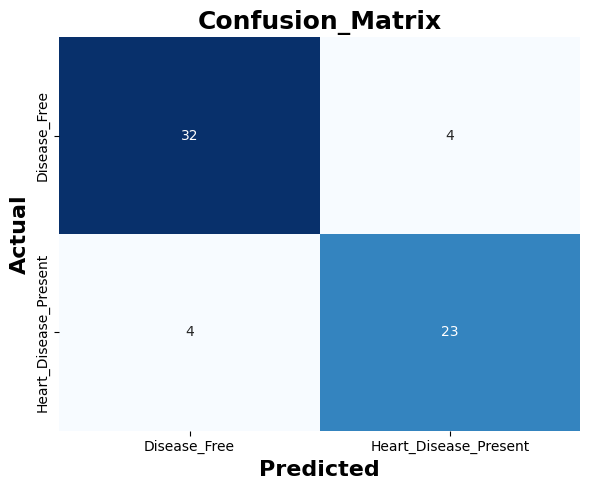

In [194]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(Y_test,Y_predicted),annot=True,cmap='Blues',cbar=False,
           xticklabels=['Disease_Free','Heart_Disease_Present'],yticklabels=['Disease_Free','Heart_Disease_Present'])
plt.xlabel("Predicted",fontweight='bold',fontsize=16)
plt.ylabel("Actual",fontweight='bold',fontsize=16)
plt.title("Confusion_Matrix",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [163]:
Y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve",fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

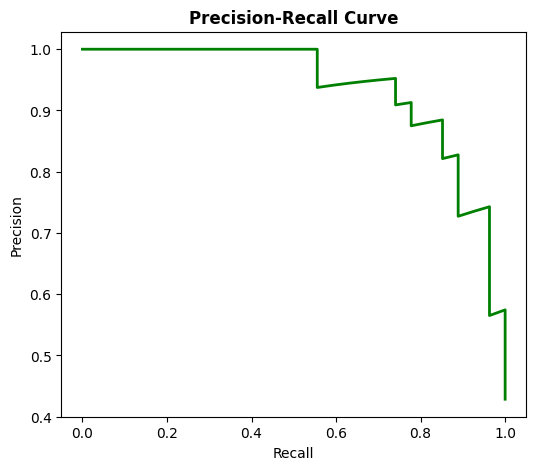

In [139]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color="green", lw=2)
plt.title("Precision-Recall Curve",fontweight='bold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()